In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\nasut\\OneDrive\\Documents\\Kuliah\\Semester 7\\PKKM\\BMKG\\Project\\MONAS-Dashboard\\Modelling'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '3_Models.ipynb',
 'Catboost-tuned.ipynb',
 'catboost_info',
 'EDA.ipynb',
 'enso.ipynb',
 'Extratreesregressor-tuned.ipynb',
 'Extratreesregressor.ipynb',
 'Extratreesregressor_1location.ipynb',
 'logs.log',
 'Split_dataset.ipynb',
 'test_arima.ipynb',
 'Test_Pycaret.ipynb',
 'test_regression.ipynb',
 'time_series_analysis.ipynb',
 'XGB_Hyperparameter copy.ipynb',
 'XGB_Hyperparameter.ipynb']

In [5]:
df = pd.read_csv('C:/Users/nasut/OneDrive/Documents/Kuliah/Semester 7/PKKM/BMKG/Project/Data/data_fix_temp.txt')

In [6]:
df

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,...,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8
544271,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,...,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0
544272,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,...,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6
544273,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,...,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4


In [7]:
X = df.drop(columns=['t_obs','Date', 'hari', 'LAT', 'LON', 'ELEV', 'UTC', 'sha_prec.mm.']) 
y = df['t_obs']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=False)

In [69]:
from xgboost import XGBRegressor
# import xgboost

In [70]:
X_train

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
1,96001,0.000000,0.0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.000000,...,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841
2,96001,0.000000,0.0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.000000,...,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813
3,96001,0.000000,0.0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.000000,...,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222
4,96001,0.000000,0.0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.000000,...,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942
5,96001,0.000000,0.0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.000000,...,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440857,97380,0.000000,0.0,24.4957,22.0766,86.5380,1.86804,149.8200,0.335231,0.056151,...,4.54828,145.8200,15.7017,76.2392,5.822790,93.5800,-5.17816,38.0221,5.03816,93.1384
440858,97380,0.000000,0.0,24.2747,22.4796,89.8688,1.54181,139.6980,0.605194,0.490726,...,3.85689,133.5230,15.0557,87.0668,5.494550,87.8026,-5.67592,47.3680,6.28198,87.1345
440859,97380,0.000000,0.0,24.0320,22.1760,89.5201,1.48522,138.3700,0.624530,0.360396,...,3.75224,130.7570,15.5615,83.7431,6.202460,105.8200,-5.56792,45.3067,6.36461,84.2517
440860,97380,0.005502,0.0,29.2982,22.7362,67.8984,2.76662,104.0030,0.768324,0.141507,...,4.00140,106.8320,15.8021,75.7657,8.644920,116.9390,-5.04455,40.0241,5.77875,95.6294


In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [74]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled,columns = X_test.columns)

In [75]:
X_train_scaled

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
0,-1.602297,-0.359228,-0.089746,0.387906,-0.529896,-0.897699,0.537883,-1.721200,-0.148595,-1.602606,...,-0.215386,-1.778051,2.187695,-4.116181,-1.320948,1.065793,-0.163162,-2.459092,0.335261,-0.998683
1,-1.602297,-0.359228,-0.089746,0.251877,-0.575881,-0.793974,0.309140,-1.570753,0.167686,-1.602606,...,-0.365616,-1.632979,2.651354,-4.371018,-1.359019,0.737332,0.033187,-2.387757,0.242176,-0.971626
2,-1.602297,-0.359228,-0.089746,0.097106,-0.623761,-0.670018,-0.288212,-1.467872,0.447111,-1.602606,...,-0.756551,-1.548395,2.484400,-4.399470,-1.302069,0.480814,0.243334,-2.275878,0.633118,-0.888770
3,-1.602297,-0.359228,-0.089746,0.056714,-0.563642,-0.583108,-0.181344,-1.642618,0.376296,-1.602606,...,-0.811157,-1.660981,1.916348,-4.277485,-1.413082,-0.664776,0.476935,-2.228958,0.816885,-0.909403
4,-1.602297,-0.359228,-0.089746,0.151686,-0.651158,-0.746466,-0.111337,-1.697439,0.114977,-1.602606,...,-0.563718,-1.660712,1.852501,-4.274065,-1.012264,-0.479409,0.581930,-2.107815,1.324222,-0.819119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440856,1.637759,-0.359228,-0.089746,-0.628580,-0.288856,0.422708,-0.393889,-0.323643,-0.943983,-1.431570,...,0.173888,-0.379021,0.399867,-0.175134,0.372883,-0.949164,-0.122727,-1.269820,-0.096234,-0.597386
440857,1.637759,-0.359228,-0.089746,-0.706000,-0.082484,0.702184,-0.588093,-0.426627,0.038517,-0.107861,...,-0.087586,-0.508184,-0.431681,0.589885,0.262908,-1.011072,-0.777478,-0.857140,0.356637,-0.665151
440858,1.637759,-0.359228,-0.089746,-0.791023,-0.237954,0.672926,-0.621781,-0.440138,0.108888,-0.504845,...,-0.127163,-0.537237,0.219398,0.355050,0.500088,-0.818007,-0.635415,-0.948159,0.386723,-0.697689
440859,1.637759,-0.356006,-0.089746,1.053827,0.048918,-1.141280,0.141034,-0.789797,0.632210,-1.171578,...,-0.032934,-0.788537,0.529104,-0.208589,1.318417,-0.698862,0.053023,-1.181419,0.173413,-0.569270


In [76]:
X_train.describe()

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
count,440861.000000,440861.000000,4.408610e+05,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,...,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000,440861.000000
mean,96682.953516,0.613525,1.630928e-01,26.290007,22.640674,81.500173,2.529708,181.629975,0.594611,0.526137,...,4.088484,181.904657,15.391058,78.717943,4.709848,182.158935,-5.084859,66.779480,5.302469,146.065906
std,425.610413,1.707900,1.817279e+00,2.854545,1.952790,11.918008,1.679833,98.287319,0.274772,0.328301,...,2.644206,95.205065,0.776865,14.153389,2.984698,93.323181,0.760229,22.646836,2.746522,88.598592
min,96001.000000,0.000000,0.000000e+00,11.674800,5.484120,23.164500,0.003070,0.001434,0.000000,0.000000,...,0.011173,0.003052,10.214400,0.000614,0.013711,0.168555,-8.813010,0.000015,0.089455,0.277085
25%,96237.000000,0.000000,0.000000e+00,24.193000,21.809800,73.396900,1.268270,102.504000,0.416093,0.265779,...,2.096530,106.037000,14.873000,72.811400,2.531600,95.156800,-5.583480,54.909700,3.205640,81.031800
50%,96737.000000,0.012311,0.000000e+00,26.458400,23.085700,82.673400,2.177200,180.066000,0.629487,0.556436,...,3.541410,174.757000,15.361400,81.767500,4.090700,188.342000,-5.099290,71.945400,4.934770,108.154000
75%,97028.000000,0.296869,2.340800e-09,28.440200,23.989500,90.927700,3.434670,264.050000,0.806754,0.803952,...,5.529920,265.620000,15.880000,88.282500,6.192770,266.448000,-4.606040,84.027000,6.998960,222.844000
max,97380.000000,35.757000,1.141500e+02,36.192300,27.035500,100.000000,22.739000,359.998000,1.000000,1.000000,...,35.930100,359.998000,19.933300,100.000000,31.953100,359.799000,-0.671190,100.000000,24.188300,359.682000


In [77]:
X_train_scaled.describe()

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
count,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,...,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05,4.408610e+05
mean,1.678041e-14,1.031498e-18,3.558669e-17,-1.991823e-15,-2.493131e-15,3.177015e-16,-3.837173e-16,9.541359e-17,-1.237798e-16,-6.601589e-17,...,2.310556e-16,2.779888e-16,-1.167037e-14,2.186776e-16,-3.795914e-16,9.035925e-16,-1.627704e-15,1.588507e-15,-6.872357e-16,-2.418863e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.602297e+00,-3.592278e-01,-8.974570e-02,-5.119983e+00,-8.785671e+00,-4.894756e+00,-1.504102e+00,-1.847937e+00,-2.164019e+00,-1.602606e+00,...,-1.541981e+00,-1.910632e+00,-6.663528e+00,-5.561736e+00,-1.573406e+00,-1.950111e+00,-4.903989e+00,-2.948736e+00,-1.898044e+00,-1.645500e+00
25%,-1.047799e+00,-3.592278e-01,-8.974570e-02,-7.346213e-01,-4.254807e-01,-6.799192e-01,-7.509313e-01,-8.050486e-01,-6.496948e-01,-7.930468e-01,...,-7.533286e-01,-7.968877e-01,-6.668574e-01,-4.173240e-01,-7.298060e-01,-9.322682e-01,-6.558828e-01,-5.241259e-01,-7.634497e-01,-7.340318e-01
50%,1.269860e-01,-3.520195e-01,-8.974570e-02,5.899114e-02,2.278928e-01,9.844164e-02,-2.098471e-01,-1.591229e-02,1.269288e-01,9.229101e-02,...,-2.068956e-01,-7.507653e-02,-3.817626e-02,2.154650e-01,-2.074411e-01,6.625441e-02,-1.898198e-02,2.281081e-01,-1.338782e-01,-4.279069e-01
75%,8.107106e-01,-1.854065e-01,-8.974570e-02,7.532531e-01,6.907183e-01,7.910330e-01,5.387224e-01,8.385631e-01,7.720722e-01,8.462218e-01,...,5.451305e-01,8.793171e-01,6.293791e-01,6.757793e-01,4.968419e-01,9.031964e-01,6.298363e-01,7.615872e-01,6.176878e-01,8.665847e-01
max,1.637759e+00,2.057703e+01,6.272401e+01,3.468960e+00,2.250539e+00,1.552260e+00,1.203055e+01,1.814763e+00,1.475369e+00,1.443382e+00,...,1.204204e+01,1.870631e+00,5.846892e+00,1.503674e+00,9.127650e+00,1.903496e+00,5.805716e+00,1.466896e+00,6.876280e+00,2.411058e+00


In [78]:
y

1         23.2
2         23.0
3         21.6
4         19.8
5         28.4
          ... 
544270    31.8
544271    35.0
544272    30.6
544273    28.4
544274    26.0
Name: t_obs, Length: 544274, dtype: float64

In [86]:
model = XGBRegressor(device='gpu', verbosity=2, n_jobs=5, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003, tree_method='gpu_hist')
model_scaled = XGBRegressor(device='gpu', verbosity=2, n_jobs=5, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003, tree_method='gpu_hist')

In [87]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': 'gpu',
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': 5,
 'num_parallel_tree': None,
 'random_state': 6601,
 'reg_alpha': 0.3,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 13.200000000000003,
 'subsample': None,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': 2}

In [92]:
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='gpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=5,
             num_parallel_tree=None, random_state=6601, ...)

In [93]:
y_pred = model.predict(X_val)
y_pred_scaled = model_scaled.predict(X_val_scaled)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

mse_scaled = mean_squared_error(y_val, y_pred_scaled)
mae_scaled = mean_absolute_error(y_val, y_pred_scaled)
r2_scaled = r2_score(y_val, y_pred_scaled)

print('Dengan Scaling')
print(f'Mean Squared Error: {mse_scaled}')
print(f'Mean Absolute Error: {mae_scaled}')
print(f'R2 Score: {r2_scaled}')

Tanpa Scaling
Mean Squared Error: 4.376400072316096
Mean Absolute Error: 1.6695950853628712
R2 Score: 0.6246917999299288

Dengan Scaling
Mean Squared Error: 4.4237053765615055
Mean Absolute Error: 1.6797512306290476
R2 Score: 0.6206350253442554


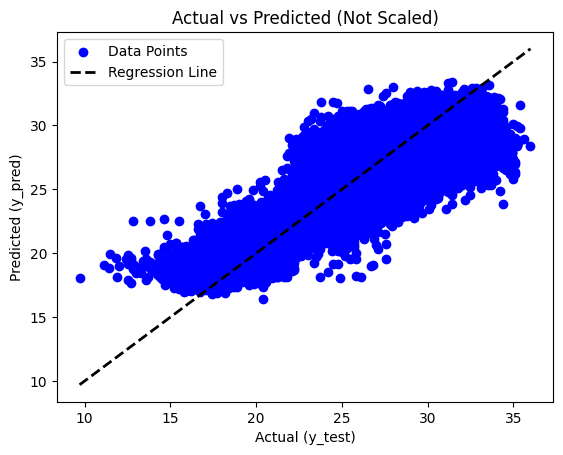

In [97]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_val), min(y_pred))
y_max = max(max(y_val), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Not Scaled)')
plt.legend()

plt.show()


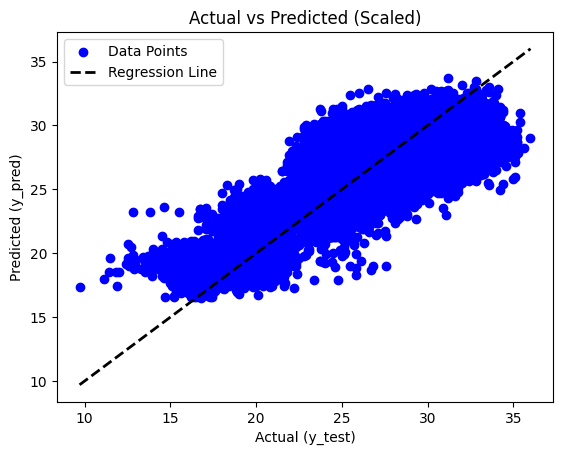

In [98]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred_scaled, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_val), min(y_pred_scaled))
y_max = max(max(y_val), max(y_pred_scaled))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()

plt.show()


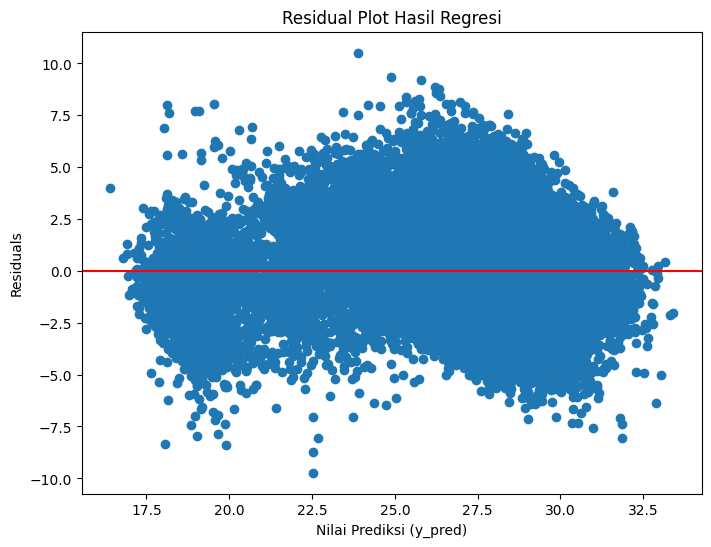

In [99]:
residuals = y_val - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Nilai Prediksi (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot Hasil Regresi")
plt.show()

In [100]:
X_test

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
489847,97694,6.024840,4.613660e-03,26.8223,24.9455,89.5926,0.903868,63.3842,0.985789,0.456599,...,0.800869,46.36310,16.1299,83.4665,6.663240,245.1200,-4.64131,83.0933,3.48384,227.6780
489848,97694,0.176095,1.043080e-07,24.9669,24.1871,95.5782,1.017560,35.6166,0.829466,0.704423,...,2.896100,6.00817,16.0668,85.3927,5.268440,251.9940,-4.62929,73.9011,2.39899,192.9610
489849,97694,0.000000,3.459770e-24,22.0521,18.9754,82.8557,1.172170,315.8030,0.544438,0.516498,...,1.362420,54.86700,14.8139,86.5019,1.976230,50.4123,-4.87717,68.2085,3.22820,92.7148
489850,97694,0.000000,1.689920e-23,27.0529,22.2226,75.0174,2.293910,64.0457,0.594310,0.619005,...,2.853730,50.85660,15.2841,81.8641,1.307080,26.4739,-5.17054,78.2384,4.19634,114.0800
489851,97694,0.267977,2.630480e-09,27.4155,23.1662,77.7617,2.415010,49.7794,0.794778,0.972064,...,2.783240,40.25630,14.4762,96.2869,0.972513,62.8587,-4.91322,77.5204,1.84959,104.8930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,99992,0.003601,0.000000e+00,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,...,5.334610,257.72700,15.4080,86.8257,6.484750,260.4710,-4.69787,73.0758,2.29511,231.9670
544271,99992,3.669660,7.573590e-21,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,...,7.737020,256.47700,15.5844,86.8180,7.014090,248.4170,-4.63960,75.7922,2.05083,268.5790
544272,99992,4.045040,2.640270e-09,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,...,10.211800,257.05600,15.7292,83.2283,8.068280,248.2330,-4.40575,77.1489,2.52709,272.9220
544273,99992,0.000000,0.000000e+00,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,...,7.960010,239.43500,15.8302,80.2176,7.675180,256.2960,-4.33471,76.3170,3.07955,259.2500


In [101]:
X.shape

(544274, 31)

In [102]:
X_test.shape

(54428, 31)

In [103]:
X_test.columns

Index(['lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'suhu2m.degC.', 'dew2m.degC.',
       'rh2m...', 'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...',
       'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.',
       'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.', 'mdbz',
       't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.', 't800.degC.',
       'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.', 'rh500...',
       'ws500.m.s.', 'wd500.deg.'],
      dtype='object')

In [109]:
y_test_val = model.predict(X_test)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [111]:
mae_test = mean_absolute_error(y_test, y_test_val)
mse_test = mean_squared_error(y_test, y_test_val)
r2_test = r2_score(y_test, y_test_val)

print(f'Mean Squared Error: {mse_test}')
print(f'Mean Absolute Error: {mae_test}')
print(f'R2 Score: {r2_test}\n')

Mean Squared Error: 3.397278846720652
Mean Absolute Error: 1.4581822468285315
R2 Score: 0.6226629411204494



In [112]:
y_val

440862    32.8
440863    31.2
440864    28.1
440865    28.1
440866    27.2
          ... 
489842    27.6
489843    25.8
489844    24.6
489845    26.2
489846    29.8
Name: t_obs, Length: 48985, dtype: float64

In [114]:
#OUTPUT

combined = pd.concat([df[['lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV']],y_test, pd.Series(y_test_val, index = X_test.index)], axis=1)
combined.columns = ['lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV', 't_obs', 'Prediction']
combined = combined.dropna()
combined.tail(15)

,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,Prediction
544260,99992,29.1739,106.7564,-6.30253,41,35.4,30.708223
544261,99992,24.9934,106.7564,-6.30253,41,25.6,26.342419
544262,99992,30.2816,106.7564,-6.30253,41,26.4,30.848757
544263,99992,31.1585,106.7564,-6.30253,41,30.6,30.135660
544264,99992,30.3046,106.7564,-6.30253,41,31.4,29.433168
544265,99992,24.3057,106.7564,-6.30253,41,26.5,25.278263
544266,99992,30.3986,106.7564,-6.30253,41,32.0,30.345226
544267,99992,31.1714,106.7564,-6.30253,41,33.2,31.728306
544268,99992,30.2010,106.7564,-6.30253,41,29.8,29.645668
544269,99992,25.1158,106.7564,-6.30253,41,25.8,25.515265


In [108]:
combined.head(50)

,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,Prediction
440862,97380,29.5344,121.83,-10.5,15,32.8,31.110657
440863,97380,28.6627,121.83,-10.5,15,31.2,30.451632
440864,97380,25.8084,121.83,-10.5,15,28.1,27.433224
440865,97380,24.8409,121.83,-10.5,15,28.1,26.602718
440866,97380,24.0134,121.83,-10.5,15,27.2,25.755947
440867,97380,23.5190,121.83,-10.5,15,25.9,25.877588
440868,97380,27.8254,121.83,-10.5,15,30.2,28.513170
440869,97380,28.6469,121.83,-10.5,15,32.6,30.951256
440870,97380,29.2099,121.83,-10.5,15,30.5,31.706102
440871,97380,28.2633,121.83,-10.5,15,31.0,30.509764


In [67]:
combined.shape

(48985, 7)

In [131]:
model.save_model("xgb_tuned.json")